# Stage 1.0

---

### _Content_:

1. Data Generation
2. Preprocessing the dataset
3. Pre-Training Setup
4. Training
5. Evaluation & Visualization
 
### _Requirements_:

1. numpy
2. matplotlib
3. scikit-learn

---

In [270]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Data Generation

In [271]:
# Set a global seed for reproducibility (To get the same random initializations)
np.random.seed(42)

In [272]:
# Assign the constants
N_SAMPLES = 100
N_INPUT_FEATURES = 1
N_OUTPUT_FEATURES = 1

In [273]:
w_random = np.random.rand() * 100 - 50 # range = [-50, 50)
b_random = np.random.rand() * 100 - 50 # range = [-50, 50)

X = np.random.normal(loc=0, scale=1, size=(N_SAMPLES, N_INPUT_FEATURES))
y = X * w_random + b_random + np.random.normal(loc=0, scale=1, size=X.shape) # Adding the noise

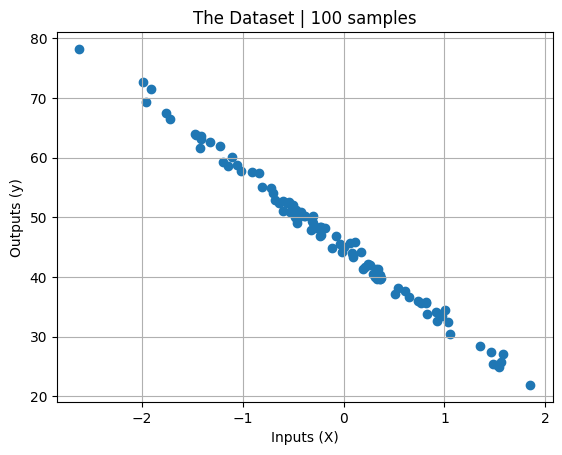

In [274]:
plt.scatter(X, y)
plt.title(f"The Dataset | {N_SAMPLES} samples")
plt.xlabel('Inputs (X)')
plt.ylabel('Outputs (y)')
plt.grid(True)
plt.show()

## 2. Preprocessing the dataset

In [275]:
from sklearn.model_selection import train_test_split

In [276]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 3. Pre-Training Setup

Using MSE (Mean Squared Error as a loss function)

In [277]:
def compute_loss(y_pred, y_real):
    errors = y_pred - y_real
    return np.mean(errors**2)

In [278]:
def compute_gradients(y_pred, y_real, X):
    errors = y_pred - y_real
    n = len(X)
    w_gradient = 2 / n * np.sum(errors * X)
    b_gradient = 2 / n * np.sum(errors)
    return {"w": w_gradient, "b": b_gradient}

In [279]:
history = {"epoch": [], "loss": [], "w": [], "b": [], "w_grad": [], "b_grad": []}

## 4. Training

In [280]:
MAX_EPOCHS = 1000
LEARNING_RATE = 0.01
MIN_LOSS = 0.8

In [281]:
epoch = 0
w = np.random.rand() + 0.1  # 0.1 is to avoid 0
b = np.random.rand() + 0.1  # range = [0.1, 1.1)

while True:

    # Forward pass
    y_pred = X_train * w + b
    loss = compute_loss(y_pred=y_pred, y_real=y_train)

    if loss <= MIN_LOSS or epoch >= MAX_EPOCHS:
        break

    # Backward pass
    gradients = compute_gradients(y_pred=y_pred, y_real=y_train, X=X_train)
    w_gradient = gradients["w"]
    b_gradient = gradients["b"]

    # Optimization
    w = w - (w_gradient * LEARNING_RATE)
    b = b - (b_gradient * LEARNING_RATE)

    epoch += 1

    history["epoch"].append(epoch)
    history["loss"].append(loss)
    history["w"].append(w)
    history["b"].append(b)
    history["w_grad"].append(w_gradient)
    history["b_grad"].append(b_gradient)


print(f"Training Finished:\t Epoch: {epoch} | Loss: {loss}")

Training Finished:	 Epoch: 1000 | Loss: 0.8009061248787216


## 5. Evaluation & Visualization

### Training

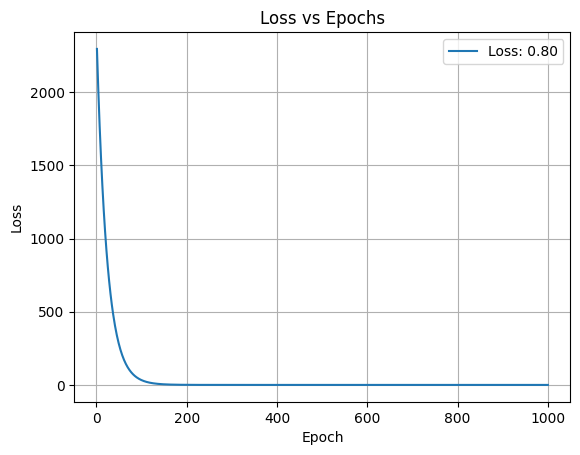

In [282]:
plt.plot(history['epoch'], history['loss'], label=f'Loss: {loss:.2f}')
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

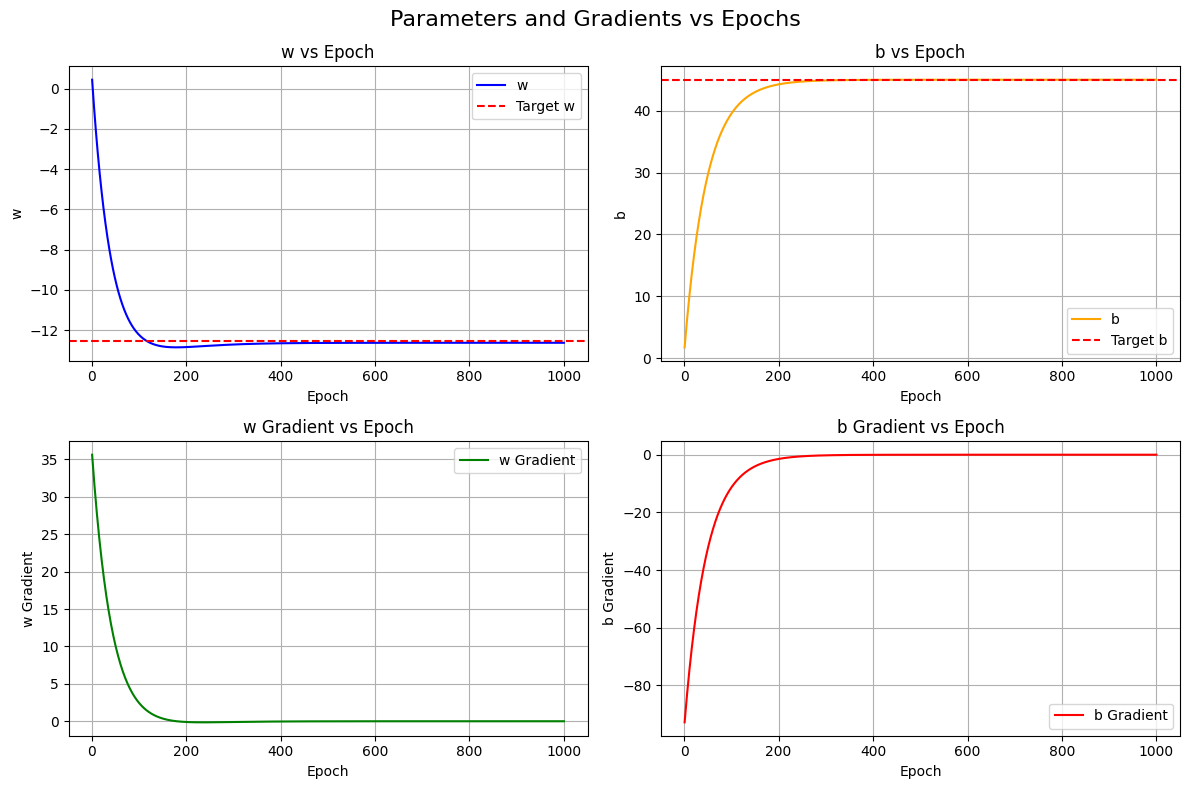

In [283]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# 1. w vs Epoch
# 2. b vs Epoch
# 3. w Gradient vs Epoch
# 4. b Gradient vs Epoch

ax[0, 0].plot(history["epoch"], history["w"], label="w", color="blue")
ax[0, 0].axhline(y=w_random, color="r", linestyle="--", label="Target w")
ax[0, 0].set_title("w vs Epoch")
ax[0, 0].set_xlabel("Epoch")
ax[0, 0].set_ylabel("w")
ax[0, 0].legend()
ax[0, 0].grid(True)

ax[0, 1].plot(history["epoch"], history["b"], label="b", color="orange")
ax[0, 1].axhline(y=b_random, color="r", linestyle="--", label="Target b")
ax[0, 1].set_title("b vs Epoch")
ax[0, 1].set_xlabel("Epoch")
ax[0, 1].set_ylabel("b")
ax[0, 1].legend()
ax[0, 1].grid(True)

ax[1, 0].plot(history["epoch"], history["w_grad"], label="w Gradient", color="green")
ax[1, 0].set_title("w Gradient vs Epoch")
ax[1, 0].set_xlabel("Epoch")
ax[1, 0].set_ylabel("w Gradient")
ax[1, 0].legend()
ax[1, 0].grid(True)

ax[1, 1].plot(history["epoch"], history["b_grad"], label="b Gradient", color="red")
ax[1, 1].set_title("b Gradient vs Epoch")
ax[1, 1].set_xlabel("Epoch")
ax[1, 1].set_ylabel("b Gradient")
ax[1, 1].legend()
ax[1, 1].grid(True)

plt.suptitle("Parameters and Gradients vs Epochs", fontsize=16)
plt.tight_layout()
plt.show()

### Testing

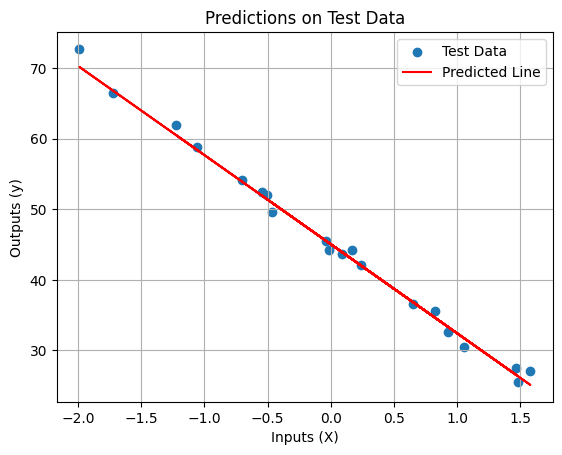

In [285]:
plt.scatter(X_test, y_test, label="Test Data")
plt.plot(X_test, X_test * w+ b, color='red', label="Predicted Line")
plt.title("Predictions on Test Data")
plt.xlabel("Inputs (X)")
plt.ylabel("Outputs (y)")
plt.legend()
plt.grid(True)
plt.show()